# Neural Networks - Visualization of Decision Boundary

In [8]:
import graphviz 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import tensorflow as tf

from utils import visualize_decision_boundary, get_linearly_separable_syntetic_dataset, get_non_linearly_separable_syntetic_dataset, get_test_dataset

random_state = 42
tf.random.set_seed(42)

print("Setup complete!")

Setup complete!


## Datasets

We will use two datasets:
- linenarly separable dataset (linear models can separate data with high accuracy)
- non-linearly separable dataset (require more complex models to separate data)

In [9]:
x_linear, y_linear = get_linearly_separable_syntetic_dataset()
print("Linearly separable dataset")
print(f"x shape: {x_linear.shape}")
print(f"y shape: {y_linear.shape}")
print(f"Instances of class 0: {np.sum(y_linear == 0)}")
print(f"Instnaces of class 1: {np.sum(y_linear == 1)}")
# concatenate x and y
data_linear = np.concatenate((x_linear, y_linear.reshape(-1, 1)), axis=1)
# convert to dataframe
data_linear = pd.DataFrame(data_linear, columns=["x1", "x2", "class"])
data_linear.head()

Linearly separable dataset
x shape: (131, 2)
y shape: (131,)
Instances of class 0: 69
Instnaces of class 1: 62


,x1,x2,class
0,0.549839,0.431158,0.0
1,0.214908,0.038266,0.0
2,0.374556,0.298371,0.0
3,0.423798,0.358793,0.0
4,0.462388,0.066191,0.0


<Axes: title={'center': 'Linearly Separable Dataset'}, xlabel='x1', ylabel='x2'>

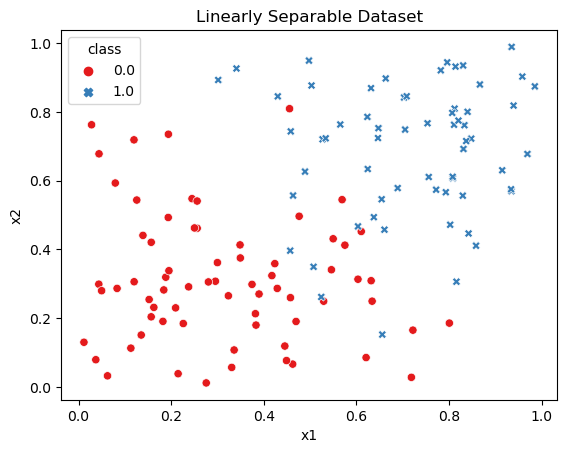

In [10]:
# visualize dataset
# create scatter plot for samples from each class
plt.title("Linearly Separable Dataset")
sns.scatterplot(x="x1", y="x2", hue='class', data=data_linear, style="class", palette="Set1")

In [11]:
x_nonlin, y_nonlin = get_non_linearly_separable_syntetic_dataset()
print(f"x shape: {x_nonlin.shape}")
print(f"y shape: {y_nonlin.shape}")
print(f"Instnaces of class 0: {np.sum(y_nonlin == 0)}")
print(f"Instnaces of class 1: {np.sum(y_nonlin == 1)}")
# concatenate x and y
data_nonlin = np.concatenate((x_nonlin, y_nonlin.reshape(-1, 1)), axis=1)
# convert to dataframe
data_nonlin = pd.DataFrame(data_nonlin, columns=["x1", "x2", "class"])
data_nonlin.head()

x shape: (244, 2)
y shape: (244,)
Instnaces of class 0: 141
Instnaces of class 1: 103


,x1,x2,class
0,0.437141,0.243791,0.0
1,0.135464,0.049833,0.0
2,0.465639,0.211246,0.0
3,0.291178,0.533000,0.0
4,0.071296,0.285568,0.0


<Axes: title={'center': 'Non-Linearly Separable Dataset'}, xlabel='x1', ylabel='x2'>

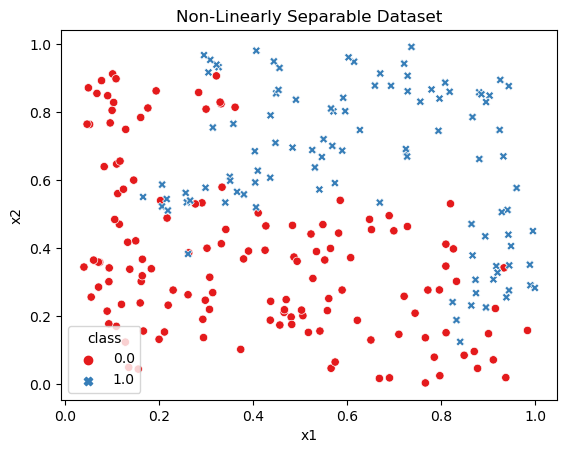

In [12]:
# visualize dataset
# create scatter plot for samples from each class
plt.title("Non-Linearly Separable Dataset")
sns.scatterplot(x="x1", y="x2", hue='class', data=data_nonlin, style="class", palette="Set1")

This is code for visualizing the decision boundary (similar to utils.py in previous weeks). You don't need to understand the code, just run it and see the results.

In [13]:
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(42)

def visualize_decision_boundary(x, y, model, ax=None, title="Decision boundary"):
    # define bounds of the domain
    additional_space = 0.1
    precision = 0.001
    min1, max1 = x[:, 0].min()-additional_space, x[:, 0].max()+additional_space
    min2, max2 = x[:, 1].min()-additional_space, x[:, 1].max()+additional_space
    # define the x and y scale
    x1grid = np.arange(min1, max1, precision)
    x2grid = np.arange(min2, max2, precision)
    # create all of the lines and rows of the grid
    xx, yy = np.meshgrid(x1grid, x2grid)
    # flatten each grid to a vector
    r1, r2 = xx.flatten(), yy.flatten()
    r1, r2 = r1.reshape((len(r1), 1)), r2.reshape((len(r2), 1))
    # horizontal stack vectors to create x1,x2 input for the model
    grid = np.hstack((r1,r2))
    # make predictions for the grid
    yhat = model.predict(grid)
    yhat = np.round(yhat)
    # reshape the predictions back into a grid
    zz = yhat.reshape(xx.shape)
    # plot the grid of x, y and z values as a surface
    if ax is None:
      plt.title(title)
      plt.contourf(xx, yy, zz, cmap='Paired')
      # create scatter plot for samples from each class
      for class_value in range(2):
          # get row indexes for samples with this class
          row_ix = np.where(y == class_value)
          # create scatter of these samples
          plt.scatter(x[row_ix, 0], x[row_ix, 1])
    else:
      ax.set_title(title)
      ax.contourf(xx, yy, zz, cmap='Paired')
      # create scatter plot for samples from each class
      for class_value in range(2):
          # get row indexes for samples with this class
          row_ix = np.where(y == class_value)
          # create scatter of these samples
          ax.scatter(x[row_ix, 0], x[row_ix, 1]) 

def sample_gaussian(mean,cov):
  w,v=np.linalg.eig(cov)
  z=np.random.normal(0,1,mean.shape[0])
  return mean+v.dot(w*z)

def get_n_samples(n,mean,cov):
  samples=[]
  for i in range(n):
    samples.append(sample_gaussian(mean,cov))
  return np.array(samples)

def create_filter(arr, x_min, x_max, y_min, y_max):
  return (arr[:,0] >= x_min) & (arr[:,0] <= x_max) & (arr[:,1] >= y_min) & (arr[:,1] <= y_max)

def create_dataset(mean1, cov1, mean2, cov2, n1, n2, bounds):
  assert type(mean1) == list and type(mean2) == list and type(cov1) == list and type(cov2) == list \
         and type(n1) == list and type(n2) == list and type(bounds) == list
  x1_list = [get_n_samples(n1[i], mean1[i], cov1[i]) for i in range(len(mean1))] 
  x2_list = [get_n_samples(n2[i], mean2[i], cov2[i]) for i in range(len(mean2))]
  x1 = np.concatenate(x1_list)
  x2 = np.concatenate(x2_list)
  y1 = np.zeros(len(x1))
  y2 = np.ones(len(x2))
  x = np.concatenate((x1, x2))
  y = np.concatenate((y1, y2))
  filter = create_filter(x, bounds[0], bounds[1], bounds[2], bounds[3])
  x = x[filter]
  y = y[filter]
  return x, y

def get_linearly_separable_syntetic_dataset():
    num_samples_class1 = [100]
    mean_class1 = [np.array([0.2, 0.2])]
    cov_class1 = [np.array([[0.25, 0],[0, 0.25]])]
    num_sample_class2 = [100]
    mean_class2 = [np.array([0.8, 0.8])]
    cov_class2 = [np.array([[0.25, 0],[0, 0.25]])]
    bounds = [0, 1, 0, 1]
    return create_dataset(mean_class1, cov_class1, mean_class2, cov_class2, num_samples_class1, num_sample_class2, bounds)

def get_non_linearly_separable_syntetic_dataset():
    num_samples_class1 = [20, 20, 20, 30, 20, 20, 10, 20]
    mean_class1 = [np.array([0.2, 0.1]), np.array([0.1, 0.3]), np.array([0.4, 0.4]), np.array([0.8, 0.1]), np.array([0.7, 0.4]), np.array([0.1, 0.7]), np.array([0.2, 0.83]), np.array([0.4, 0.2])]
    cov_class1 = [np.array([[0.2, 0],[0, 0.2]]), np.array([[0.05, 0],[0, 0.1]]), np.array([[0.12, 0],[0, 0.07]]), np.array([[0.15, 0],[0, 0.1]]), np.array([[0.05, 0.15],[0.15, 0.05]]), np.array([[0.05, 0],[0, 0.15]]), np.array([[0.1, 0],[0, 0.05]]), np.array([[0.2, 0],[0, 0.1]])]
    num_sample_class2 = [20, 10, 20, 20, 30, 20, 10, 10]
    mean_class2 = [np.array([0.8, 0.9]), np.array([0.4, 0.6]), np.array([0.4, 0.8]), np.array([0.9, 0.85]), np.array([0.95, 0.35]), np.array([0.53, 0.87]), np.array([0.22, 0.53]), np.array([0.55, 0.8])]
    cov_class2 = [np.array([[0.2, 0],[0, 0.2]]), np.array([[0.08, 0],[0, 0.05]]), np.array([[0.1, -0.07],[-0.07, 0.15]]), np.array([[0.15, 0],[0, 0.1]]), np.array([[0.07, 0],[0, 0.2]]), np.array([[0.15, -0.1],[-0.1, 0.15]]), np.array([[0.07, 0],[0, 0.05]]), np.array([[0.15, 0],[0, 0.15]])]  
    bounds = [0, 1, 0, 1]
    return create_dataset(mean_class1, cov_class1, mean_class2, cov_class2, num_samples_class1, num_sample_class2, bounds)

def get_test_dataset():
    num_samples_class1 = [20]
    mean_class1 = [np.array([0.55, 0.35])]
    cov_class1 = [np.array([[0.05, 0.1],[0.1, 0.05]])]
    num_sample_class2 = [20]
    mean_class2 = [np.array([0.5, 0.83])]
    cov_class2 = [np.array([[0.1, -0.1],[-0.1, 0.1]])]
    bounds = [0, 1, 0, 1]
    return create_dataset(mean_class1, cov_class1, mean_class2, cov_class2, num_samples_class1, num_sample_class2, bounds)




Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 50)                150       
                                                                 
 dense_7 (Dense)             (None, 50)                2550      
                                                                 
 dense_8 (Dense)             (None, 1)                 51        
                                                                 
Total params: 2751 (10.75 KB)
Trainable params: 2751 (10.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


43292/43292 [==============================] - 23s 539us/step


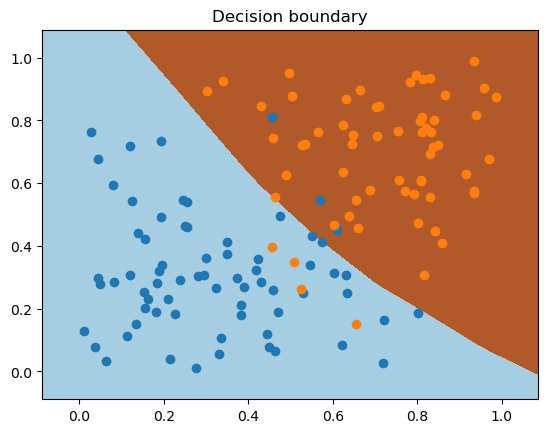

In [14]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(50, input_shape=(2,), activation="relu"),
    tf.keras.layers.Dense(50, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid"),
])

model.summary()

model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

model.fit(x_linear, y_linear, epochs=100, verbose=0)

visualize_decision_boundary(x_linear, y_linear, model)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 50)                150       
                                                                 
 dense_10 (Dense)            (None, 50)                2550      
                                                                 
 dense_11 (Dense)            (None, 1)                 51        
                                                                 
Total params: 2751 (10.75 KB)
Trainable params: 2751 (10.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
43028/43028 [==============================] - 24s 551us/step


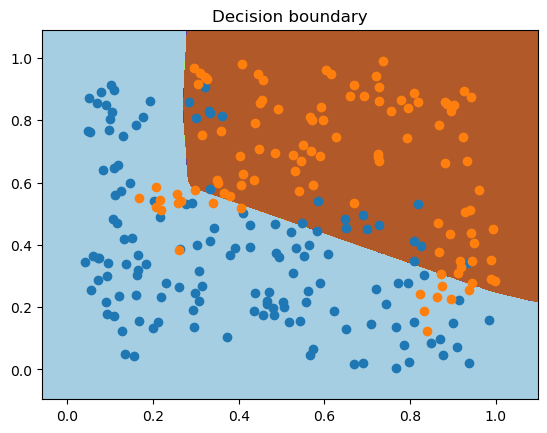

In [15]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(50, input_shape=(2,), activation="relu"),
    tf.keras.layers.Dense(50, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid"),
])

model.summary()

model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

model.fit(x_nonlin, y_nonlin, epochs=100, verbose=0)

visualize_decision_boundary(x_nonlin, y_nonlin, model)